In [14]:
import pandas as pd
import praw
import textstat
import os
from dotenv import load_dotenv
from praw.models import MoreComments
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
load_dotenv()
AGENT = os.getenv('USER_AGENT')
CLIENT = os.getenv('CLIENT_ID')
SECRET = os.getenv('CLIENT_SECRET')

In [8]:
reddit = praw.Reddit(user_agent=AGENT,
                     client_id=CLIENT, client_secret=SECRET)

posts = []

for submission in reddit.subreddit("nba").new():
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        posts.append(top_level_comment.body)

posts = pd.DataFrame(posts,columns=["body"])
indexNames = posts[(posts.body == '[removed]') | (posts.body == '[deleted]')].index
posts.drop(indexNames, inplace=True)

In [9]:
posts

,body
0,This is cool asf lmao
1,Need more fan interactions like this.
2,He responded every single time instead of even...
3,Keith Van Horn
4,Darius Miles' Clipper Jersey & Johnathan Bende...
...,...
2314,Come on guys just finish out the rest of the s...
2315,Every time I see a wolves thread kat has less ...
2316,Not fun to watch a game when the refs sauce th...
2317,This team doesn’t need Ja lol


In [12]:
text = " ".join(review for review in posts.body)
wordcloud = WordCloud(background_color="white").generate(text)

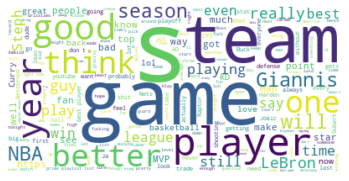

In [15]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\malcolm\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
